In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [15]:
import requests
requests.__version__

'2.24.0'

In [16]:
# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e16460b22c7329d4ce3a321d5cac51a3


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# # Create an empty list to hold the weather data
# city_data = []
# # Print the beginning of the logging
# print("Beginning Data Retrieval      ")
# print("------------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city
#     city_url = url + "&q=" + cities[i]

In [20]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | lolua
City not found. Skipping...
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | semirom
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | vanderhoof
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | rafaela
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | prenzlau
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | lakes entrance
Processing Record 20 of Set 1 | sault sainte marie
Processing Record 21 of Set

Processing Record 36 of Set 4 | porto belo
Processing Record 37 of Set 4 | san andres
Processing Record 38 of Set 4 | a
City not found. Skipping...
Processing Record 39 of Set 4 | amapa
Processing Record 40 of Set 4 | xining
Processing Record 41 of Set 4 | oistins
Processing Record 42 of Set 4 | kizukuri
Processing Record 43 of Set 4 | cururupu
Processing Record 44 of Set 4 | bay city
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | kokopo
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | nantucket
Processing Record 50 of Set 4 | saint-leu
Processing Record 1 of Set 5 | ig
City not found. Skipping...
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | batagay
Processing Record 5 of Set 5 | udachnyy
Processing Record 6 of Set 5 | ixtapa
Processing Record 7 of Set 5 | nsawam
Processing Record 8 of Set 5 | liwale
Processing Record 9 of Set 5 | ishigaki

Processing Record 23 of Set 8 | chapais
Processing Record 24 of Set 8 | oktyabrskiy
Processing Record 25 of Set 8 | sibolga
Processing Record 26 of Set 8 | besskorbnaya
Processing Record 27 of Set 8 | hofn
Processing Record 28 of Set 8 | iskateley
Processing Record 29 of Set 8 | grand bank
Processing Record 30 of Set 8 | agucadoura
Processing Record 31 of Set 8 | muzhi
Processing Record 32 of Set 8 | port-cartier
Processing Record 33 of Set 8 | ambilobe
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | crystal beach
Processing Record 36 of Set 8 | kuytun
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | crab hill
City not found. Skipping...
Processing Record 39 of Set 8 | toktogul
Processing Record 40 of Set 8 | ryotsu
Processing Record 41 of Set 8 | caravelas
Processing Record 42 of Set 8 | mandiana
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | pontal do parana
Processing Record 45 of Set 8 | zabid
Processing Record 46

Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | catamarca
Processing Record 14 of Set 12 | linkoping
Processing Record 15 of Set 12 | taltal
Processing Record 16 of Set 12 | walvis bay
Processing Record 17 of Set 12 | oranjemund
Processing Record 18 of Set 12 | kerchevskiy
Processing Record 19 of Set 12 | finschhafen
Processing Record 20 of Set 12 | artyk
City not found. Skipping...
Processing Record 21 of Set 12 | sri aman
Processing Record 22 of Set 12 | abhar
Processing Record 23 of Set 12 | mattawa
Processing Record 24 of Set 12 | peniche
Processing Record 25 of Set 12 | trairi
Processing Record 26 of Set 12 | duku
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | khasan
Processing Record 30 of Set 12 | payo
Processing Record 31 of Set 12 | conde
Processing Record 32 of Set 12 | esperance
Processing Record 33 of Set 12 | okha
Processing Record 34 of Set 12 | mandalgovi
Processing Record 35 o

In [23]:
len(city_data)

569

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acarau,-2.8856,-40.1200,82.58,74,70,13.20,BR,2021-04-13 19:23:27
1,Semirom,31.4167,51.5667,48.47,68,7,3.04,IR,2021-04-13 19:23:28
2,Barrow,71.2906,-156.7887,-0.40,71,1,8.05,US,2021-04-13 19:23:28
3,Bredasdorp,-34.5322,20.0403,64.40,88,22,3.60,ZA,2021-04-13 19:23:28
4,Vanderhoof,54.0166,-124.0198,49.23,37,66,1.77,CA,2021-04-13 19:23:29
5,Cayenne,4.9333,-52.3333,86.00,70,40,12.66,GF,2021-04-13 19:22:22
6,Rafaela,-31.2503,-61.4867,79.00,38,0,3.00,AR,2021-04-13 19:23:29
7,Chokurdakh,70.6333,147.9167,-13.02,97,15,5.84,RU,2021-04-13 19:23:29
8,Sisimiut,66.9395,-53.6735,31.75,98,100,5.82,GL,2021-04-13 19:23:30
9,Lebu,-37.6167,-73.6500,62.40,79,87,16.15,CL,2021-04-13 19:23:30


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acarau,BR,2021-04-13 19:23:27,-2.8856,-40.1200,82.58,74,70,13.20
1,Semirom,IR,2021-04-13 19:23:28,31.4167,51.5667,48.47,68,7,3.04
2,Barrow,US,2021-04-13 19:23:28,71.2906,-156.7887,-0.40,71,1,8.05
3,Bredasdorp,ZA,2021-04-13 19:23:28,-34.5322,20.0403,64.40,88,22,3.60
4,Vanderhoof,CA,2021-04-13 19:23:29,54.0166,-124.0198,49.23,37,66,1.77
5,Cayenne,GF,2021-04-13 19:22:22,4.9333,-52.3333,86.00,70,40,12.66
6,Rafaela,AR,2021-04-13 19:23:29,-31.2503,-61.4867,79.00,38,0,3.00
7,Chokurdakh,RU,2021-04-13 19:23:29,70.6333,147.9167,-13.02,97,15,5.84
8,Sisimiut,GL,2021-04-13 19:23:30,66.9395,-53.6735,31.75,98,100,5.82
9,Lebu,CL,2021-04-13 19:23:30,-37.6167,-73.6500,62.40,79,87,16.15


In [27]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

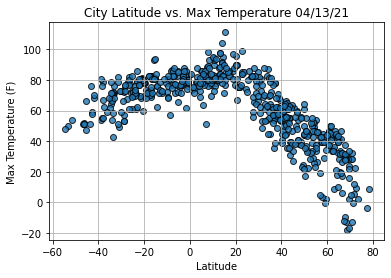

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

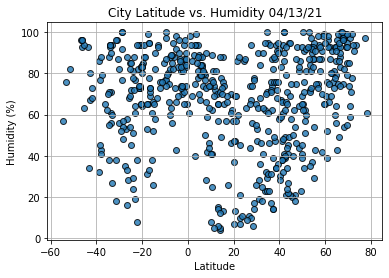

In [32]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

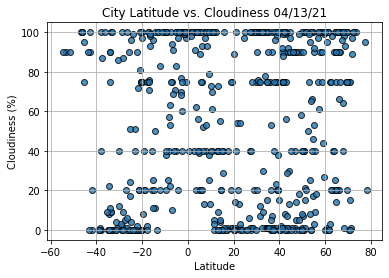

In [34]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()